# A Friedmanesque Stochastic Growth Model

Friedman (1957) proposed that consumers understand that some components of income are transitory and others are permanent.  

This turns out to be a pretty good description of both micro and macro income dynamics, and a particularly clear way to think about the dynamics of income and consumption.

Consider an economy with the following features:

1. There is a permanent component of aggregate labor productivity that grows by a stochastic factor $\Psi$ and is subject to mean one IID shocks:
\begin{eqnarray}
P_{t+1} & = & \Psi_{t+1} P_{t}
\end{eqnarray}
1. "Efficiency units" of labor are hours worked $N$ multiplied by productivity per hour $P$ multiplied by a transitory shock $\Theta$: $N P \Theta$.  Labor is supplied inelastically, so we can conveniently normalize the number of hours to $N = 1$.  The transitory and permanent productivity shocks are assumed to be mean-one lognormally distributed variables, $\mathbb{E}_{t}[\Psi_{t+n}]=\mathbb{E}_{t}[\Theta_{t+n}]=1~\forall~n>0$.
1. We define assets after all actions have been accomplished in period $t$ as the portion of market resources that have not been consumed.  The assets with which the consumer ends the period are therefore
\begin{eqnarray}
A_{t} & = & M_{t}-C_{t}
\end{eqnarray}
1. Gross output is generated by a Cobb-Douglas production function, where the unconsumed assets $A_{t}$ from the previous period constitute the capital stock; the process of production is what causes depreciation.  Combining these, next period's "Market resources"  (current income plus what remains of capital after production) are
\begin{eqnarray}
M_{t+1} & = & A_{t}^{\alpha}(\Theta_{t+1} P_{t+1} N_{t+1})^{1-\alpha} + (1-\delta) A_{t}
\end{eqnarray}


Assuming no population growth and normalizing to $N=1$, problem of a representative consumer with Constant Relative Risk Aversion felicity $u(c)=c^{1-\rho}/(1-\rho)$ is therefore to
\begin{eqnarray}
V_{t}(M_{t},P_{t}) & = & \max_{C_{t}}~\left(\frac{C_{t}^{1-\rho}}{1-\rho}\right) + \beta \mathbb{E}_{t}[V_{t+1}(M_{t+1})]
\\ & \text{s.t.} & \\
A_{t}   & = & M_{t}-C_{t} \\
M_{t+1} & = & A_{t}^{\alpha}(\Theta_{t+1} P_{t+1})^{1-\alpha} + (1-\delta) A_{t}
\end{eqnarray}



Now consider the related problem:
\begin{eqnarray}
v_{t}(m_{t}) & = & \max_{c_{t}}~\left(\frac{c_{t}^{1-\rho}}{1-\rho}\right) + \beta \mathbb{E}_{t}[\Psi_{t+1}^{1-\rho}v_{t+1}(m_{t+1})]
\\ & \text{s.t.} & \\
a_{t}   & = & m_{t}-c_{t} \\
m_{t+1} & = & (a_{t}/\Psi_{t+1})^{\alpha}\Theta_{t+1}^{1-\alpha}+(1-\delta) a_{t}/\Psi_{t+1}
\end{eqnarray}
whose full details are specified in the companion dolo model file.  (In that file, the first equation appears in the "definitions" block, and the second constitutes the "transition" equation.)

It can be shown (never mind the algebra) that 
\begin{eqnarray}
V_{t}(M_{t},P_{t}) & = & P_{t}^{1-\rho}v_{t}(m_{t})
\end{eqnarray}
where $m_{t}=M_{t}/P_{t}$ and $c_{t}=C_{t}/P_{t}$
so that the solution to the latter problem $c_{t}(m_{t})$ yields the solution to the former problem via $C_{t}(M_{t},P_{t}) = P_{t} c_{t}(M_{t}/P_{t})$.  So when we solve the simpler problem with one state variable, we have also solved the harder one with two states.

In the solution, it is useful to have an expression for the expected value of next period's state at the end of the current period, $\mathfrak{v}_{t}(a_{t})=\mathbb{E}_{t}[\Psi_{t+1}^{1-\rho} v_{t+1}(m_{t+1})]$. Substituting the definition of $m_{t+1}$ then differentiating the end-of-period value function 
\begin{eqnarray}
\mathfrak{v}_{t}(a_{t}) & = & \mathbb{E}_{t}[\Psi_{t+1}^{1-\rho}v_{t+1}(\overbrace{(a_{t}/\Psi_{t+1})^{\alpha}\Theta_{t+1}^{1-\alpha}+(1-\delta) a_{t}/\Psi_{t+1}}^{m_{t+1}})]
\\ \mathfrak{v}^{a}_{t}(a_{t}) & = & \mathbb{E}_{t}\left[\Psi_{t+1}^{1-\rho}\underbrace{\left((\alpha/\Psi_{t+1})(a_{t}/\Psi_{t+1})^{\alpha-1}\Theta_{t+1}^{1-\alpha}+(1-\delta)/\Psi_{t+1}) \right)}_{\equiv R_{t+1}=dm_{t+1}/da_{t}}v^{m}_{t+1}(m_{t+1})\right]
\\  & = & \mathbb{E}_{t}\left[\Psi_{t+1}^{-\rho}\left(\alpha(a_{t}/\Psi_{t+1})^{\alpha-1}\Theta_{t+1}^{1-\alpha}+(1-\delta)) \right)u^{\prime}(c_{t+1})\right]
\end{eqnarray}
where the last step uses the Envelope relationship $v^{m}(m_{t})=u^{\prime}(c_{t+1})$.  This expression constitutes the "expectation" equation in dolo.

The first order condition is:
\begin{eqnarray}
c_{t}^{-\rho} & = & \beta \mathbb{E}_{t}[\Psi_{t+1}^{-\rho}\left(\alpha(a_{t}/\Psi_{t+1})^{\alpha-1}\Theta_{t+1}^{1-\alpha}+(1-\delta)) \right)(c_{t+1}^{-\rho})]
\\ & = & \mathbb{E}_{t}[\left(\alpha(a_{t}/\Psi_{t})^{\alpha-1}\Theta_{t+1}^{1-\alpha}+(1-\delta)\right)(c_{t+1}\Psi_{t+1})^{-\rho}]
\end{eqnarray}

The endogenous gridpoints method uses the fact that
\begin{eqnarray}
c_{t} & = & \left(\beta \mathfrak{v}^{\prime}_{t}(a_{t})\right)^{-1/\rho}
\end{eqnarray}
so that if we pick a grid of values of $a_{t,i}$ then from that we can generate the corresponding $c_{t,i}$ and $m_{t,i}=a_{t,i}+c_{t,i}$ without any numerical search.

A convenient alternative way of expressing the Euler equation is 
\begin{eqnarray}
0 & = & 1-\mathbb{E}_{t}[\left(\alpha(a_{t}/\Psi_{t})^{\alpha-1}\Theta_{t+1}^{1-\alpha}+(1-\delta)\right)(c_{t+1}\Psi_{t+1}/c_{t})^{-\rho}]
\end{eqnarray}
which constitutes the "arbitrage" equation in dolo.

To solve this model in dolo we need to provide a starting point.  A good starting point is the nonstochastic steady-state: ($P = \Theta = N = \ell = 1$):
\begin{eqnarray}
1 & = & \beta(1-\delta+ \alpha k^{\alpha-1}) \\ 
\beta^{-1}+\delta-1 & = & \alpha k^{\alpha-1} \\
\left(\frac{\alpha}{\beta^{-1}+\delta-1}\right)^{1/(1-\alpha)} & = & k
\end{eqnarray}

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Solving the Friedman RBC model

This worksheet demonstrates how to solve the rbc_friedman model with the [dolo](http://econforge.github.io/dolo/) library and how to generate impulse responses and stochastic simulations from the solution.

- This notebook is distributed with dolo in : ``examples\notebooks\``. The notebook was opened and run from that directory.
- The model file is in : ``examples\global_models\``

First we import the dolo library. 

In [3]:
from dolo import * 

# Importing the model 

The RBC model is defined in a [YAML](http://www.yaml.org/spec/1.2/spec.html#Introduction) file which we can read locally or pull off the web.

In [217]:
# filename = ('https://raw.githubusercontent.com/EconForge/dolo'
#             '/master/examples/models/compat/rbc.yaml')

filename='../models/rbc_friedman_k-as-state.yaml'
filename='../models/rbc_friedman_m-as-state.yaml'
%cat $filename 

name: Friedman-RA

symbols:

   exogenous:    [lΨ, lΘ] # Ψ is the persistent shock, Θ is transitory, l means log
   states:       [lP, m]
   controls:     [c]
   expectations: [μ]
   values:       [V]
   parameters:   [β, ρ, δ, α, lPmean, σ_lΨ, lΘmean, σ_lΘ]
   rewards:      [u]

definitions:
    Ψ: exp(lΨ)
    Θ: exp(lΘ)
    P: exp(lP)
    a: m-c

equations:

    arbitrage:
       - 1 -  β*(1-δ+α*((a/Ψ(1))^(α-1))*(Θ(1)^(1-α)))*(Ψ(1)*c(1)/c)^(-ρ)  | 0.0 <= c <= m # Liquidity constraint 

    transition:
        - lP = lP(-1) + lΨ
        - m = ((a(-1)/exp(lΨ))^α)*exp(lΘ)^(α-1)+(1-δ)*(a(-1)/exp(lΨ)) # oddly, can't sub Θ(1) for exp(lΘ(1)) (same with Ψ) though it works in arbitrage

    value:
        - V = (c^(1-ρ))/(1-ρ) + β*V(1)

    felicity:
        - u =  (c^(1-ρ))/(1-ρ)

# Turned off because causes a strange error about how numba can't tell what type a is
#    expectation:
#       -  μ =(1-δ+α*((a/exp(lΨ(1)))^(α-1))*(exp(lΘ(1))^(1-α)))*(exp(lΨ(1))*c(1)/c)^(-ρ) 

calibration:

    #

`yaml_import(filename)` reads the YAML file and generates a model object. 

The model file already has values for steady-state variables stated in the calibration section so we can go ahead and check that they are correct by computing the model equations at the steady state.

In [244]:
model.residuals()

{'transition': array([0., 0.]), 'arbitrage': array([1.11022302e-16])}

Printing the model also lets us have a look at all the model equations and check that all residual errors are 0 at the steady-state, but with less display prescision.

In [109]:
# print( model ) 


        Model:
        ------
        name: "Real Business Cycle - No Labor Choice, Permanent shocks"
        type: "dtcc"
        file: "/Volumes/Data/GitHub/llorracc/dolo/examples/models/rbc_cdc-to_030-Add-Transitory-Shocks.yaml

Equations:
----------

transition
 1  : 0.0000 : lP(0) == (ω) * (lP(-(1))) + e_lP(0)
 2  : 0.0000 : k(0) == ((1) - (δ)) * (k(-(1))) + i(-(1))

arbitrage
 1  : 0.0000 : (1) - (((β) * (((c(0)) / (c(1))) ** (ρ))) * ((1) - (δ) + rk(1)))

definitions
 1  : y = k**α*(exp(lP)*exp(e_lT)*n)**(1-α)
 2  : c = y - i
 3  : rk = α*y/k
 4  : w = (1-α)*y/(n*exp(lP)*exp(e_lT))




Next we compute a solution to the model using a first order perturbation method (see the source for the [approximate_controls](https://github.com/EconForge/dolo/blob/master/dolo/algos/perturbation.py) function). The result is a decsion rule object. By decision rule we refer to any object that is callable and maps states to decisions. This particular decision rule object is a TaylorExpansion (see the source for the [TaylorExpansion](https://github.com/EconForge/dolo/blob/master/dolo/numeric/taylor_expansion.py)  class).

In [7]:
# This cell is for debugging purposes and can be ignored
tool is needed to inspect the decision rules after they have been constructed
import inspect
import copy

record = []
def record_dr():
    """This function is called at each iteration and looks at its surrounding to record decision rules at each iteration."""
    frame = inspect.currentframe().f_back
    dr = frame.f_locals['mdr']
    it = frame.f_locals['it']
    record.append((it,copy.copy(dr)))
    
filename='../models/rbc_friedman_m-as-state.yaml'

model = yaml_import(filename) 
model.residuals() 
dr_pert = perturbate(model)
record = []
dr_global = time_iteration(model, hook=record_dr, initial_guess=dr_pert,verbose=False)
tabs = [tabulate(model, dr_global, 'm') for it,dr in record]
#plt.plot(tabs[0]['k'],tabs[0]['k'],linestyle='--',color='black')
# this one approximates, 
#plt.plot(tabs[0]['k'],1+0*tabs[0]['m'],linestyle='--',color='black')
for i,t in enumerate(tabs):
    if i%10==0:
        plt.plot(t['m'],t['c'], alpha=0.1, color='red')
plt.show()

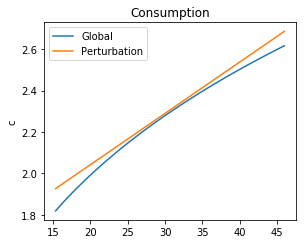

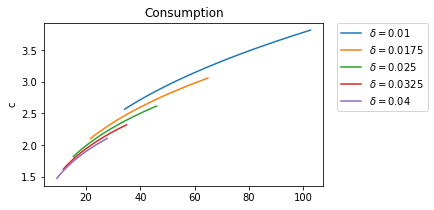

In [216]:
tab_global = tabulate(model, dr_global, 'm')
tab_pert = tabulate(model, dr_pert, 'm')
from matplotlib import pyplot as plt

plt.figure(figsize=(8,3.5))

plt.subplot(121)
plt.plot(tab_global['m'], tab_global['c'], label='Global')
plt.plot(tab_pert['m'], tab_pert['c'], label='Perturbation')
plt.ylabel('c')
plt.title('Consumption')
plt.legend()

# plt.subplot(122)
# plt.plot(tab_global['m'], tab_global['n'], label='Global')
# plt.plot(tab_pert['m'], tab_pert['n'], label='Perturbation')
# plt.ylabel('n')
# plt.title('Labour')
# plt.legend()

plt.tight_layout()

original_delta = model.calibration['δ'] 

drs = []
delta_values = np.linspace(0.01, 0.04,5)
for val in delta_values:
    model.set_calibration(δ=val)
    drs.append(time_iteration(model,verbose=False))

    
plt.figure(figsize=(5,3))

for i,dr in enumerate(drs):
    sim = tabulate(model, dr,'m')
    plt.plot(sim['m'],sim['c'], label='$\delta={}$'.format(delta_values[i]))
plt.ylabel('c')
plt.title('Consumption')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

model.set_calibration(δ=original_delta)

# Decision rule

Here we plot optimal investment and labour for different levels of capital (see the source for the [plot_decision_rule](https://github.com/EconForge/dolo/blob/master/dolo/algos/simulations.py) function).

It would seem, according to this, that second order perturbation does very well for the RBC model. We will revisit this issue more rigorously when we explore the deviations from the model's arbitrage section equations.

Let us repeat the calculation of investment decisions for various values of the depreciation rate, $\delta$. Note that this is a comparative statics exercise, even though the models compared are dynamic.

We find that more durable capital leads to higher steady state investment and slows the rate of convergence for capital (the slopes are roughly the same, which implies that relative to steady state capital investment responds stronger at higher $\delta$; this is in addition to the direct effect of depreciation).

# Use the model to simulate

We will use the deterministic steady-state as a starting point.

In [223]:
s0 = model.calibration['states']
print(str(model.symbols['states'])+'='+str(s0))

['lP', 'm']=[ 0.         30.65503629]


We also get the covariance matrix just in case. This is a one shock model so all we have is the variance of $e_z$.

In [224]:
sigma2_ez = model.exogenous.Sigma
sigma2_ez

array([[0.0001, 0.    ],
       [0.    , 0.0001]])

## Impulse response functions

Consider a 10% shock to productivity.

In [225]:
s1 = s0.copy()
s1[0] *= 1.1
print(str(model.symbols['states'])+'='+str(s1))

['lP', 'm']=[ 0.         30.65503629]


The `simulate` function is used both to trace impulse response functions and to compute stochastic simulations. Choosing `n_exp>=1`, will result in that many "stochastic" simulations. With `n_exp = 0`, we get one single simulation without any stochastic shock (see the source for the [simulate](https://github.com/EconForge/dolo/blob/master/dolo/algos/simulations.py) function). 
The output is a panda table of size $H \times n_v$ where $n_v$ is the number of variables in the model and $H$ the number of dates.

In [226]:
simulate(model, dr, N=50, T=350)

<xarray.DataArray (T: 350, N: 50, V: 9)>
array([[[ 4.967142e-03, -1.382643e-03, ...,  1.000000e+00,  2.848139e+01],
        [ 6.476885e-03,  1.523030e-02, ...,  1.000000e+00,  2.848139e+01],
        ...,
        [ 2.961203e-03,  2.610553e-03, ...,  1.000000e+00,  2.848139e+01],
        [ 5.113457e-05, -2.345871e-03, ...,  1.000000e+00,  2.848139e+01]],

       [[-1.415371e-02, -4.206453e-03, ...,  1.004979e+00,  2.847609e+01],
        [-3.427145e-03, -8.022773e-03, ...,  1.006498e+00,  2.840130e+01],
        ...,
        [-8.838574e-03,  1.537251e-03, ...,  1.002966e+00,  2.852435e+01],
        [ 5.820872e-04, -1.142970e-02, ...,  1.000051e+00,  2.861577e+01]],

       ...,

       [[ 6.345310e-05,  1.576224e-02, ...,  1.016313e+00,  3.835740e+01],
        [ 6.754013e-03,  9.806720e-03, ...,  9.949731e-01,  3.806206e+01],
        ...,
        [ 3.292693e-03, -8.725248e-03, ...,  1.170974e+00,  3.915838e+01],
        [ 1.207953e-02,  1.244451e-02, ...,  8.573315e-01,  3.751667e+01]],

 

In [227]:
from dolo.algos.simulations import response

In [228]:
m0 = model.calibration["exogenous"]

In [229]:
s0 = model.calibration["states"]

In [230]:
dr.eval_ms(m0, s0)

array([2.17364242])

In [231]:
irf = response(model,dr, 'lΨ')

Let us plot the response of consumption and assets.  Note that a positive shock to the level of productivity _reduces_ the values of the variables, because they are all expressed as _ratios_ to the level of productivity.

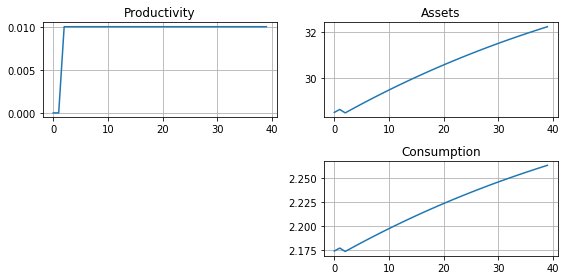

In [232]:
plt.figure(figsize=(8,4))
plt.subplot(221)
plt.plot(irf.sel(V='lP'))
plt.title('Productivity')
plt.grid()
plt.subplot(222)
plt.plot(irf.sel(V='a'))
plt.title('Assets')
plt.grid()
#plt.subplot(223)
#plt.plot(irf.sel(V='n'))
#plt.grid()
#plt.title('Labour')
plt.subplot(224)
plt.plot(irf.sel(V='c'))
plt.title('Consumption')
plt.grid()
plt.tight_layout()

Note that the plotting is made using the wonderful [matplotlib](http://matplotlib.org/users/pyplot_tutorial.html) library. Read the online [tutorials](http://matplotlib.org/users/beginner.html) to learn how to customize the plots to your needs (e.g., using [latex](http://matplotlib.org/users/usetex.html) in annotations). If instead you would like to produce charts in Matlab, you can easily export the impulse response functions, or any other matrix, to a `.mat` file.

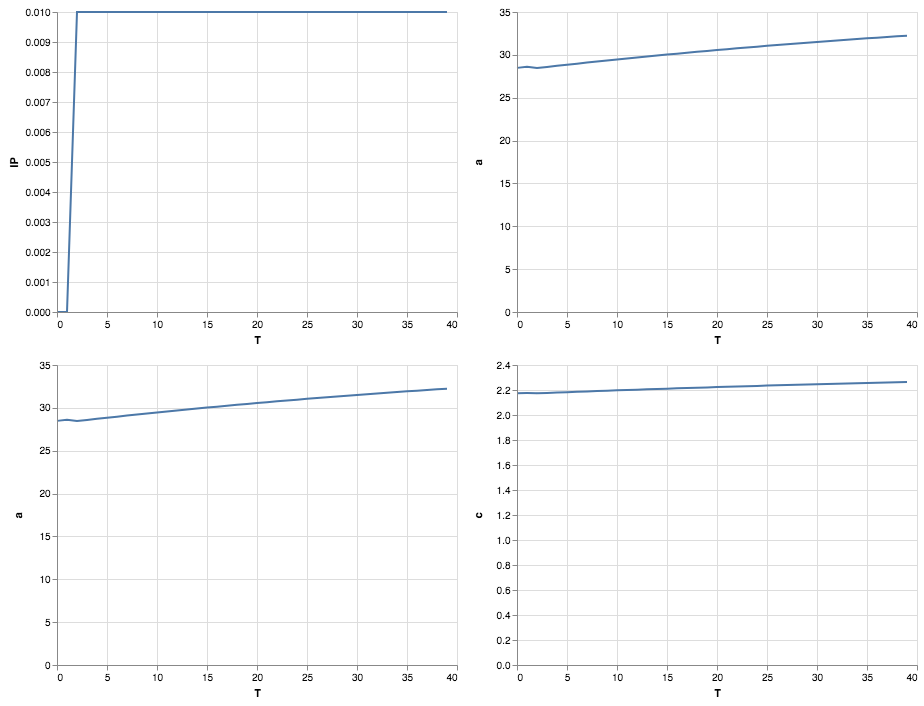

In [233]:
# it is also possible (and fun) to use the graph visualization altair lib instead:
# it is not part of dolo dependencies. To install `conda install -c conda-forge altair`
import altair as alt
alt.renderers.enable('notebook')
df = irf.drop('N').to_pandas().reset_index() # convert to flat database
base = alt.Chart(df).mark_line()
ch1 = base.encode(x='T', y='lP')
ch2 = base.encode(x='T', y='a')
ch3 = base.encode(x='T', y='n')
ch4 = base.encode(x='T', y='c')
(ch1|ch2)& \
(ch2|ch4)

In [234]:
irf_array = np.array( irf )
import scipy.io
scipy.io.savemat("export.mat", {'table': irf_array} )

## Stochastic simulations

Now we run 1000 random simulations.  The result is an array of size $T\times N \times n_v$ where 
- $T$ the number of dates
- $N$ the number of simulations
- $n_v$ is the number of variables


In [235]:
sim = simulate(model, dr_global, N=1000, T=40 )
print(sim.shape)

(40, 1000, 9)


We plot the responses of consumption, investment and labour to the stochastic path of productivity.

    
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


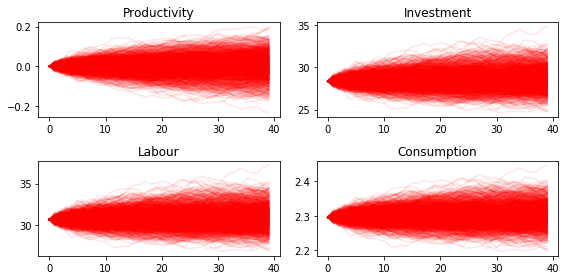

In [236]:
plt.figure(figsize=(8,4))
for i in range(1000):
    plt.subplot(221)
    plt.plot(sim.sel(N=i,V='lP'), color='red', alpha=0.1)
    plt.subplot(222)
    plt.plot(sim.sel(N=i,V='a'), color='red', alpha=0.1)
    plt.subplot(223)
    plt.plot(sim.sel(N=i,V='m'), color='red', alpha=0.1)
    plt.subplot(224)
    plt.plot(sim.sel(N=i,V='c'), color='red', alpha=0.1)

plt.subplot(221)
plt.title('Productivity')
plt.subplot(222)
plt.title('Investment')
plt.subplot(223)
plt.title('Labour')
plt.subplot(224)
plt.title('Consumption')

plt.tight_layout()

We find that while the distribution of investment and labour converges quickly to the ergodic distribution, that of consumption takes noticeably longer. This is indicative of higher persistence in consumption, which in turn could be explained by permanent income considerations.

# Descriptive statistics
A common way to evaluate the success of the RBC model is in its ability to mimic patterns in the descriptive statistics of the real economy. Let us compute some of these descriptive statistics from our sample of stochastic simulations. First we compute growth rates:

In [237]:
dsim = sim / sim.shift(T=1)

Then we compute the volatility of growth rates for each simulation:

In [238]:
volat = dsim.std(axis=1)
print(volat.shape)

(40, 9)


In [239]:
volat

<xarray.DataArray (T: 40, V: 9)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [2.130386e+01, 8.951995e+00,          nan, ..., 1.444552e-02,
        9.614065e-03, 9.497104e-03],
       [1.347149e+02, 1.231190e+02, 2.130386e+01, ..., 1.379481e-02,
        1.007612e-02, 9.984263e-03],
       ...,
       [3.266107e+01, 1.515243e+01, 5.498430e+00, ..., 1.375393e-02,
        1.018380e-02, 1.007653e-02],
       [1.709415e+01, 7.110591e+01, 2.687413e+00, ..., 1.429991e-02,
        1.016367e-02, 1.001672e-02],
       [1.828549e+01, 1.716592e+01, 3.183650e+01, ..., 1.427218e-02,
        1.017542e-02, 1.010109e-02]])
Coordinates:
  * T        (T) int64 0 1 2 3 4 5 6 7 8 9 10 ... 30 31 32 33 34 35 36 37 38 39
  * V        (V) <U2 'lΨ' 'lΘ' 'lP' 'm' 'c' 'Ψ' 'Θ' 'P' 'a'

Then we compute the mean and a confidence interval for each variable. In the generated table the first column contains the standard deviations of growth rates. The second and third columns contain the lower and upper bounds of the 95% confidence intervals, respectively.

In [240]:
table = np.column_stack([
    volat.mean(axis=0),
    volat.mean(axis=0)-1.96*volat.std(axis=0),
    volat.mean(axis=0)+1.96*volat.std(axis=0)  ])
table

array([[ 7.77311895e+01, -1.99029409e+02,  3.54491788e+02],
       [ 6.76881012e+01, -8.68620359e+01,  2.22238238e+02],
       [ 3.50016009e+01, -8.07077559e+01,  1.50710958e+02],
       [ 9.41704585e-03,  8.99470666e-03,  9.83938504e-03],
       [ 3.07616444e-03,  2.93777102e-03,  3.21455785e-03],
       [ 1.41895253e-02,  1.35653980e-02,  1.48136527e-02],
       [ 1.40767352e-02,  1.33713857e-02,  1.47820847e-02],
       [ 1.00401764e-02,  9.58336503e-03,  1.04969878e-02],
       [ 9.92832614e-03,  9.48302955e-03,  1.03736227e-02]])

We can use the [pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html) library to present the results in a nice table.

In [241]:
import pandas
df = pandas.DataFrame(table, index=sim.V, 
                      columns=['Growth rate std.',
                               'Lower 95% bound',
                               'Upper 95% bound' ])
pandas.set_option('precision', 4)
df

,Growth rate std.,Lower 95% bound,Upper 95% bound
V,,,
lΨ,77.7312,-199.0294,354.4918
lΘ,67.6881,-86.8620,222.2382
lP,35.0016,-80.7078,150.7110
m,0.0094,0.0090,0.0098
c,0.0031,0.0029,0.0032
Ψ,0.0142,0.0136,0.0148
Θ,0.0141,0.0134,0.0148
P,0.0100,0.0096,0.0105
a,0.0099,0.0095,0.0104


# Error measures
<mark>Marked text</mark>


It is always important to get a handle on the accuracy of the solution. The `omega` function computes and aggregates the errors for the model's arbitrage section equations. For the RBC model these are the investment demand and labor supply equations. For each equation it reports the maximum error over the domain and the mean error using ergodic distribution weights (see the source for the [omega](https://github.com/EconForge/dolo/blob/master/dolo/algos/fg/accuracy.py) function).

In [242]:
from dolo.algos.accuracy import omega

print("Perturbation solution")
err_pert = omega(model, dr_pert)
err_pert

ModuleNotFoundError: No module named 'dolo.algos.accuracy'

In [243]:
print("Global solution")
err_global=omega(model, dr_global)
err_global

Global solution


NameError: name 'omega' is not defined

The result of `omega` is a subclass of `dict`. `omega` fills that dict with some useful information that the default print does not reveal:

In [ ]:
err_pert.keys()

In particular the domain field  contains information, like bounds and shape, that we can use to plot the spatial pattern of errors.

In [ ]:
a = err_pert['domain'].a
b = err_pert['domain'].b
orders = err_pert['domain'].orders
errors = concatenate((err_pert['errors'].reshape( orders.tolist()+[-1] ),
                      err_global['errors'].reshape( orders.tolist()+[-1] )),
                     2)

figure(figsize=(8,6))

titles=["Investment demand pertubation errors",
        "Labor supply pertubation errors",
        "Investment demand global errors",
        "Labor supply global errors"]

for i in range(4):

    subplot(2,2,i+1)
    imgplot = imshow(errors[:,:,i], origin='lower', 
                     extent=( a[0], b[0], a[1], b[1]), aspect='auto')
    imgplot.set_clim(0,3e-4)
    colorbar()
    xlabel('z')
    ylabel('k')
    title(titles[i])

tight_layout()